# BME-450 Meteorology Project
Caleb Taing, 2/21/2020
Timeframe: 15 May, 2018 23:00:00.000 to 15 May, 2019 23:00:00.000

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json
import pytz
import numpy as np
import requests
import datetime as dt
import time 
from datetime import datetime
import datetime
from pandas.plotting import register_matplotlib_converters
import scipy.stats as ss

In [23]:
USERNAME ='OOIAPI-ZKR5O629PC7ULN'
TOKEN= 'TEMP-TOKEN-UBTCW3TSWEG03J'
DATA_API_BASE_URL = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

In [24]:
#Arrays for Cross Correlation
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

In [25]:
#Time conversion into UTC
ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

In [26]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-15T23:00:00.000Z&endDT=2019-05-15T23:00:00.000Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-05-15T23:00:00.000Z&endDT=2019-05-15T23:00:00.000Z&limit=1000']

# General Averages

In [27]:

def avgSet(time,velocity,precipitation):

    #Defining velocities throughout year
    Jan_velocity = []
    Feb_velocity = []
    March_velocity = []
    April_velocity = []
    May_velocity = []
    June_velocity = []
    July_velocity = []
    Aug_velocity = []
    Sept_velocity = []
    Oct_velocity = []
    Nov_velocity = []
    Dec_velocity = []

    #Defining precipitation rate throughout year
    Jan_precipitation = []
    Feb_precipitation = []
    March_precipitation = []
    April_precipitation = []
    May_precipitation = []
    June_precipitation = []
    July_precipitation = []
    Aug_precipitation = []
    Sept_precipitation = []
    Oct_precipitation = []
    Nov_precipitation = []
    Dec_precipitation = []

    #Defining averages for velocity and precipitation
    avg_velocity = []
    avg_precipitation = []

    Months = ['January',
              'February',
              'March',
              'April',
              'May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December']

    #Repeating loop based on length of time, that defines velocity and precipitation
    #for each existing month by dividing 12
    for i in range(len(time)):
        if i <= int(round((len(time)/12),0)):
            Jan_velocity.append(velocity[i])
            Jan_precipitation.append(precipitation[i])
        elif i > int(round((len(time)/12),0)) and i <= 2*int(round((len(time)/12),0)):
            Feb_velocity.append(velocity[i])
            Feb_precipitation.append(precipitation[i])
        elif i > 2*int(round((len(time)/12),0)) and i <= 3*int(round((len(time)/12),0)):
            March_velocity.append(velocity[i])
            March_precipitation.append(precipitation[i])
        elif i > 3*int(round((len(time)/12),0)) and i <= 4*int(round((len(time)/12),0)):
            April_velocity.append(velocity[i])
            April_precipitation.append(precipitation[i])
        elif i > 4*int(round((len(time)/12),0)) and i <= 5*int(round((len(time)/12),0)):
            May_velocity.append(velocity[i])
            May_precipitation.append(precipitation[i])
        elif i > 5*int(round((len(time)/12),0)) and i <= 6*int(round((len(time)/12),0)):
            June_velocity.append(velocity[i])
            June_precipitation.append(precipitation[i])
        elif i > 6*int(round((len(time)/12),0)) and i <= 7*int(round((len(time)/12),0)):
            July_velocity.append(velocity[i])
            July_precipitation.append(precipitation[i])
        elif i > 7*int(round((len(time)/12),0)) and i <= 8*int(round((len(time)/12),0)):
            Aug_velocity.append(velocity[i])
            Aug_precipitation.append(precipitation[i])
        elif i > 8*int(round((len(time)/12),0)) and i <= 9*int(round((len(time)/12),0)):
            Sept_velocity.append(velocity[i])
            Sept_precipitation.append(precipitation[i])
        elif i > 9*int(round((len(time)/12),0)) and i <= 10*int(round((len(time)/12),0)):
            Oct_velocity.append(velocity[i])
            Oct_precipitation.append(precipitation[i])
        elif i > 10*int(round((len(time)/12),0)) and i <= 11*int(round((len(time)/12),0)):
            Nov_velocity.append(velocity[i])
            Nov_precipitation.append(precipitation[i])
        elif i > 11*int(round((len(time)/12),0)):
            Dec_velocity.append(velocity[i])
            Dec_precipitation.append(precipitation[i])

    #Performs average of every months data repeating throughout for loop
    avg_velocity.append(np.mean(Dec_velocity))
    avg_precipitation.append(np.mean(Dec_precipitation))
    avg_velocity.append(np.mean(Nov_velocity))
    avg_precipitation.append(np.mean(Nov_precipitation))
    avg_velocity.append(np.mean(Oct_velocity))
    avg_precipitation.append(np.mean(Oct_precipitation))
    avg_velocity.append(np.mean(Sept_velocity))
    avg_precipitation.append(np.mean(Sept_precipitation))
    avg_velocity.append(np.mean(Aug_velocity))
    avg_precipitation.append(np.mean(Aug_precipitation))
    avg_velocity.append(np.mean(July_velocity))
    avg_precipitation.append(np.mean(July_precipitation))
    avg_velocity.append(np.mean(June_velocity))
    avg_precipitation.append(np.mean(June_precipitation))
    avg_velocity.append(np.mean(May_velocity))
    avg_precipitation.append(np.mean(May_precipitation))
    avg_velocity.append(np.mean(April_velocity))
    avg_precipitation.append(np.mean(April_precipitation))
    avg_velocity.append(np.mean(March_velocity))
    avg_precipitation.append(np.mean(March_precipitation))
    avg_velocity.append(np.mean(Feb_velocity))
    avg_precipitation.append(np.mean(Feb_precipitation))
    avg_velocity.append(np.mean(Jan_velocity))
    avg_precipitation.append(np.mean(Jan_precipitation))

    return avg_velocity,avg_precipitation,Months


# Generating Wind Speed vs Rain Rate plots

Oregon Shelf Surface Mooring - Surface Buoy


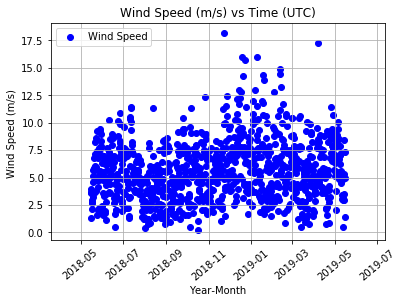

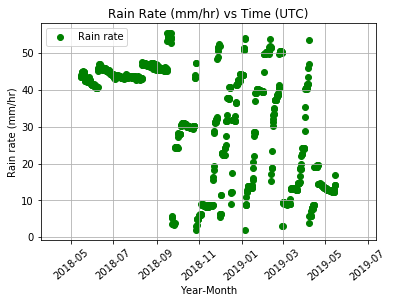

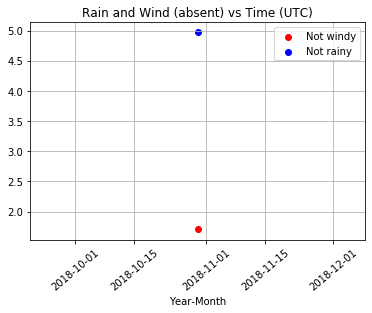

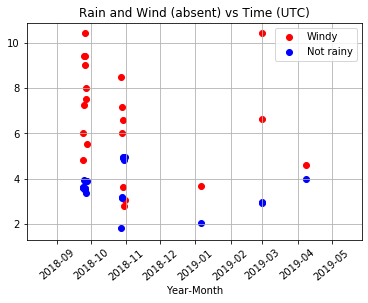

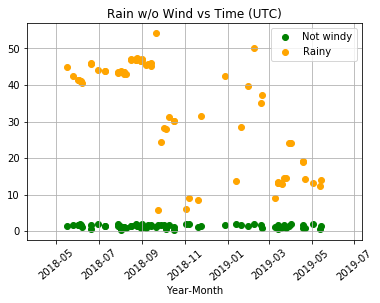

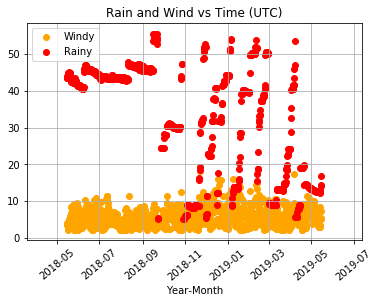

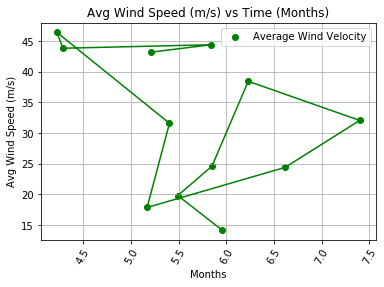

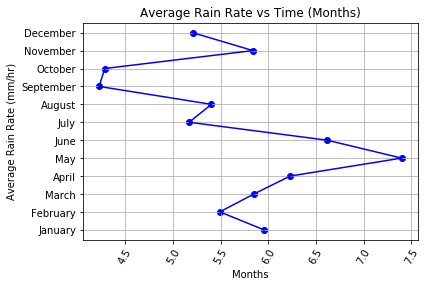

Oregon Offshore Surface Mooring - Surface Buoy


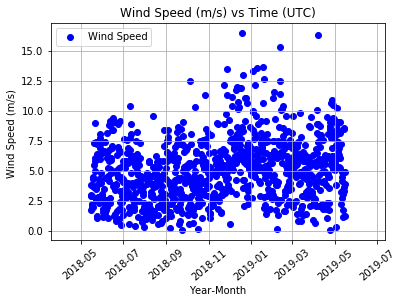

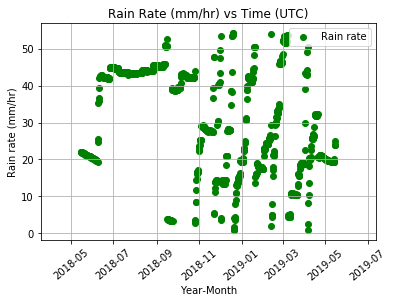

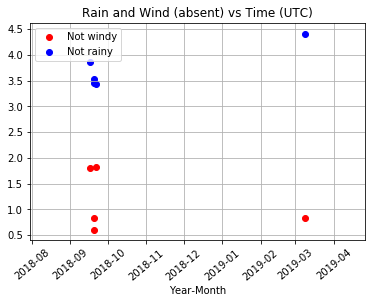

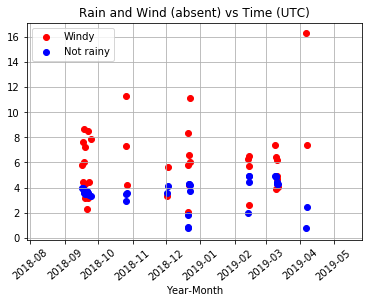

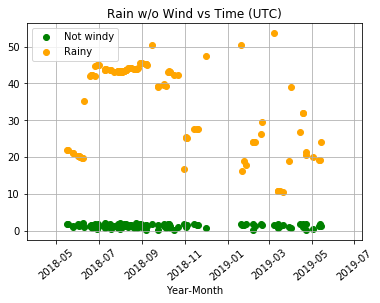

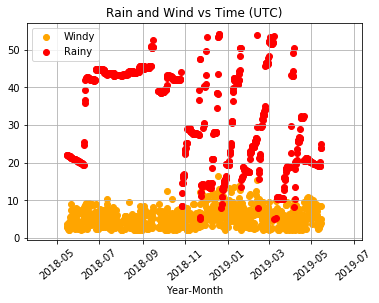

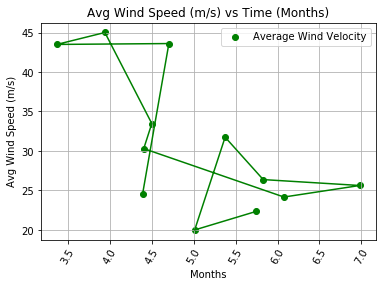

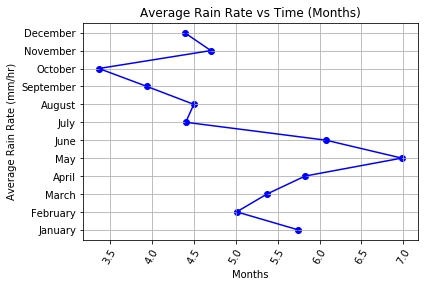

In [28]:
#Repetitive loop based within the number of url's present (2)
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    
    #Defines first url as OSSM
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
        
    #Defines second url as OOSM
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: No rainy and not windy
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy and not rainy
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy and not windy
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: No rainy and not windy
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy and not rainy
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy and not windy
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
            
    # wind speed vs time
    plt.scatter(time,velocity, color= 'blue',label = 'Wind Speed')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Wind Speed (m/s) ')
    plt.title('Wind Speed (m/s) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    # rain rate vs time
    plt.scatter(time,precipitation, color='green',label = 'Rain rate')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Rain rate (mm/hr)')
    plt.title('Rain Rate (mm/hr) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    
    # not windy not rainy vs time
    plt.scatter(time1,velocity1,color = 'red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and Wind (absent) vs Time (UTC)')
    plt.grid(True)
    plt.show()
   
    
    # not rainy and windy vs time
    plt.scatter(time2,velocity2,color = 'red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and Wind (absent) vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    # Rainy and not windy vs time
    plt.scatter(time3,velocity3,color = 'green',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'orange',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain w/o Wind vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    # rainy and windy vs time
    plt.scatter(time4,velocity4,color = 'orange', label='Windy')
    plt.scatter(time4,precipitation4,color = 'red',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rain and Wind vs Time (UTC)')
    plt.grid(True)
    plt.show()
    
    
    #   ------------  The monthly average of the wind speed and rain ratefor each site ----------------
    
    #calling a avgSet function from previous cell~
    avg = avgSet(time,velocity,precipitation)
    
    #Normalizing velocity and precipitation
    mean_vel=np.mean(velocity)
    mean_precipitate=np.mean(precipitation)
    
    # From return function
    # 0 = Months
    # 1 = Wind Velocity
    # 2 = Rain rate
    plt.scatter(avg[0],avg[1],color='green',label = 'Average Wind Velocity')
    plt.plot(avg[0],avg[1],color='green')
    plt.legend()
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Avg Wind Speed (m/s)')
    plt.title('Avg Wind Speed (m/s) vs Time (Months)')
    plt.grid(True)
    plt.show()
    
    plt.scatter(avg[0],avg[2],color='blue',label = 'Average Rain rate')
    plt.plot(avg[0],avg[2],color='blue')
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Average Rain Rate (mm/hr)')
    plt.title('Average Rain Rate vs Time (Months)')
    plt.grid(True)
    plt.show()